# Домашняя работа №1

**Срок сдачи:** 9 октября 2017, 23:59 <br\>

При отправлении ДЗ в Dropbox указывайте фамилию в названии файла: <br\>
** IDA<Номер группы>HW1<Фамилия>.ipynb ** - например ** IDA1HW1Panov.ipynb **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [1]:
# Для кириллицы на графиках
import matplotlib.pyplot as plt

font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

In [2]:
import pandas as pnd
import numpy as np
import seaborn as sbn
from sklearn.preprocessing import StandardScaler
%matplotlib inline

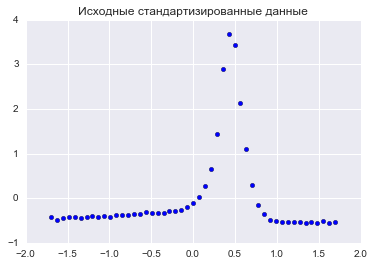

In [3]:
df = pnd.read_csv("titanium.csv", sep=",")
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
X, y = df_scaled[:, 0], df_scaled[:, 1]
X = X.reshape(-1, 1)
y.shape = (len(y), )
plt.title("Исходные стандартизированные данные")
plt.scatter(X, y)

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [8]:
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_absolute_error
from sklearn import svm

KF = KFold(n = 49, n_folds = 4, shuffle = True, random_state = 1234)
range_c = [10**(-i) for i in range(-2, 10)]

linear_mae, tlinear_mae = [], []

for c in range_c:
    for train_index, val_index in KF:
        linear_model = svm.LinearSVR(epsilon = 0.01, C = c)
        linear_model.fit(X[train_index], y[train_index])
        linear_predict = linear_model.predict(X[val_index])
        tlinear_mae.append(mean_absolute_error(y[val_index], linear_predict))
    linear_mae.append(np.mean(tlinear_mae))

poly_mae, tpoly_mae = [], []

for c in range_c:
    for train_index, val_index in KF:
        poly_model = svm.SVR(kernel = 'poly', epsilon = 0.01, C = c, gamma = 6, coef0 = 1, degree = 3)
        poly_model.fit(X[train_index], y[train_index])
        poly_predict = poly_model.predict(X[val_index])
        tpoly_mae.append(mean_absolute_error(y[val_index], poly_predict))
    poly_mae.append(np.mean(tpoly_mae))
    
rbf_mae, trbf_mae = [], []

for c in range_c:
    for train_index, val_index in KF:
        rbf_model = svm.SVR(kernel = 'rbf', epsilon = 0.01, C = c, gamma = 6, coef0 = 1)
        rbf_model.fit(X[train_index], y[train_index])
        rbf_predict = rbf_model.predict(X[val_index])
        trbf_mae.append(mean_absolute_error(y[val_index], rbf_predict))
    rbf_mae.append(np.mean(trbf_mae))

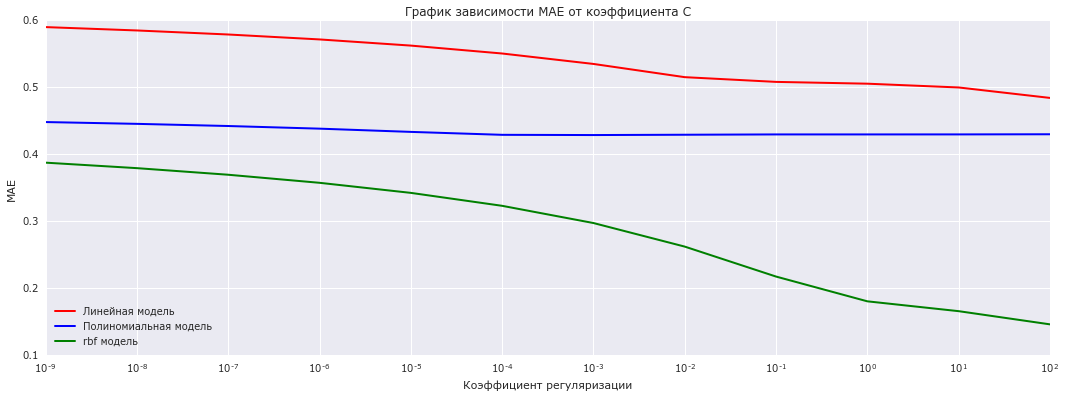

In [9]:
plt.figure(1, figsize=[18, 6])
plt.title("График зависимости MAE от коэффициента С")
plt.plot(range_c, linear_mae, color = 'red', lw = 2)
plt.plot(range_c, poly_mae, color = 'blue', lw = 2)
plt.plot(range_c, rbf_mae, color = 'green', lw = 2)
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('MAE')
plt.legend(["Линейная модель", "Полиномиальная модель", 'rbf модель'], loc = 3)
plt.xscale('log')

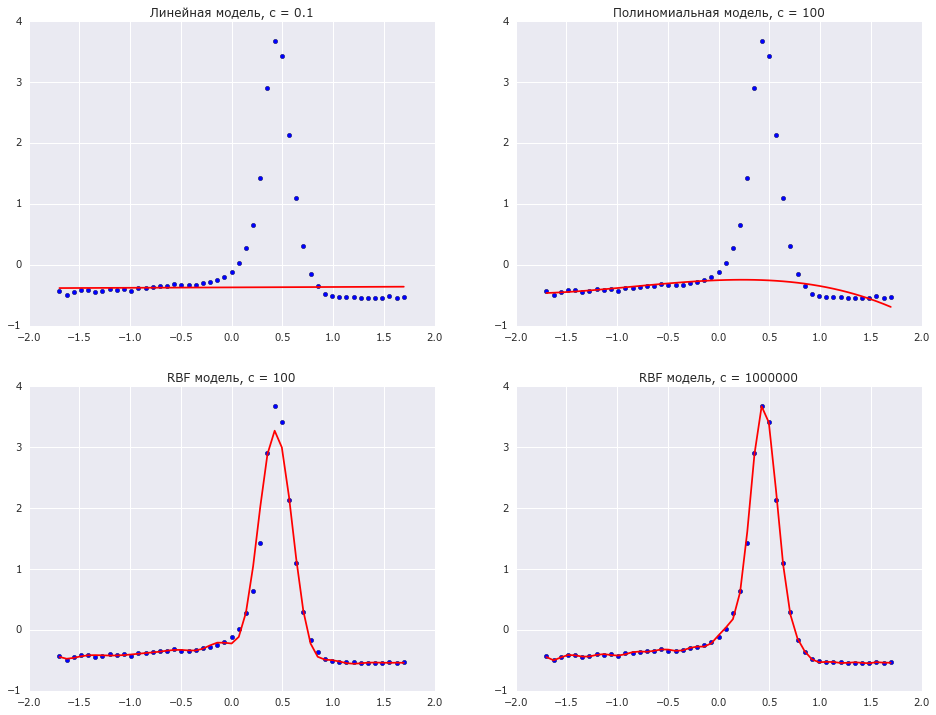

In [10]:
plt.figure(1, figsize=[16, 12])

plt.subplot(221)
linear_model = svm.SVR(kernel = 'linear', epsilon = 0.01, C = range_c[np.argmin(linear_mae)])
linear_model.fit(X, y)
plt.scatter(X, y)
plt.title('Линейная модель, с = 0.1')
plt.plot(X, linear_model.predict(X), color = 'red')

plt.subplot(222)
poly_model = svm.SVR(kernel = 'poly', epsilon = 0.01, C = range_c[np.argmin(poly_mae)], gamma = 6, coef0 = 1)
poly_model.fit(X, y)
plt.scatter(X, y)
plt.title('Полиномиальная модель, с = 100')
plt.plot(X, poly_model.predict(X), color = 'red')

plt.subplot(223)
rbf_model = svm.SVR(kernel = 'rbf', epsilon = 0.01, C = range_c[np.argmin(rbf_mae)], gamma = 6, coef0 = 1)
rbf_model.fit(X, y)
plt.scatter(X, y)
plt.title('RBF модель, c = 100')
plt.plot(X, rbf_model.predict(X), color = 'red')

plt.subplot(224)
rbf_model = svm.SVR(kernel = 'rbf', epsilon = 0.01, C = 1000000, gamma = 6, coef0 = 1)
rbf_model.fit(X, y)
plt.scatter(X, y)
plt.title('RBF модель, c = 1000000')
plt.plot(X, rbf_model.predict(X), color = 'red')

# Выводы по графикам
Если обратить внимание на графики, то можно заметить, что линейная и полиномиальная модель не дают возможности решить данную задачу, очевидно недообучение, прямая и полином абсолютно не соответствуют данным. Модель с rbf ядром дает самый адекватный результат из всех обученных выше моделей, но и тут не все так гладко, ведь если задать неадекватно большой коэффициент С = 1 000 000, то модель полностью подстроится под все точки - на лицо эффект переобучения. При С = 100 получается вполне адекватная модель с МАЕ = 0.14.

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [4]:
es = pnd.read_csv('war_and_peace_es.txt', sep = " ", header = None)
es.columns = ['word']

en = pnd.read_csv('war_and_peace_en.txt', sep = " ", header = None)
en.columns = ['word']

es['label'] = 0
en['label'] = 1

df = es.append(en)
X, y = df.word.values, df.label.values

## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [12]:
RND_SEED = 123

In [13]:
from sklearn.cross_validation import train_test_split

X_train_init, X_test, y_train_init, y_test = train_test_split(X, y, test_size = 0.2, random_state = RND_SEED)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

n_grams = [2, 3, 4, 5, 6, 7]
c_range = [10**(-i) for i in range(-2, 10)]

In [15]:
n_scores, c_scores = [], []
n_grams = [2, 3, 4, 5, 6, 7]
c_range = [10**(-i) for i in range(-2, 10)]
for n in n_grams:
    for c in c_range:
        text_clf = Pipeline([('vectorizer', CountVectorizer(analyzer = 'char', ngram_range = (n, n))),
                             ('classificator', svm.SVC(kernel = 'linear', C = c)),
                            ])
        text_clf.fit(X_train_init, y_train_init)
        c_scores.append(text_clf.score(X_test, y_test))
    n_scores.append(c_scores)
    c_scores = []

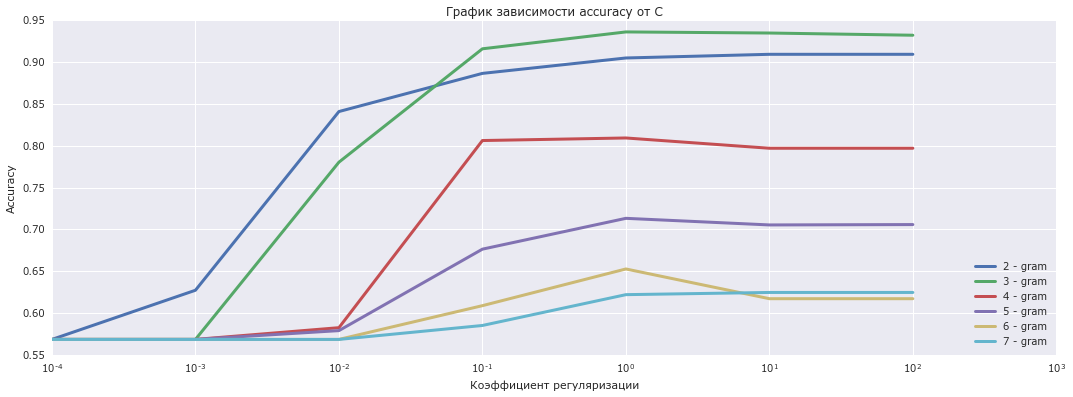

In [16]:
plt.figure(1, figsize = [18, 6])

for i in range(len(n_grams)):
    plt.plot(range_c, n_scores[i], lw = 3)
plt.legend(['2 - gram', '3 - gram', '4 - gram', '5 - gram', '6 - gram', '7 - gram'], loc = 4)
plt.xlabel('Коэффициент регуляризации')
plt.xscale('log')
plt.title('График зависимости accuracy от C')
plt.xlim([10**-4, 10**3])
plt.ylabel('Accuracy')

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

In [5]:
RND_SEED = 47

In [6]:
df_mixed = df.sample(len(df), random_state = RND_SEED).reset_index()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 123)

df_mixed2 = df_mixed[:1000]
X, y = df_mixed2.word.values, df_mixed2.label.values

for train_index, test_index in sss.split(X, y):    
    X_train, X_test = train_index, test_index

In [8]:
y_train, y_test = y[X_train], y[X_test]

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [9]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]

In [10]:
def string_kernel(U, V):
    kernel_matrix = pnd.DataFrame()
    
    for i in U:
        for j in V:
            wfi = wfi_levenshtein(X[i], X[j])
            kernel_matrix.loc[i, j] = np.exp(-1 * (wfi ** 2))
    return np.array(kernel_matrix)

In [11]:
kernel_res = string_kernel(X_train, X_train)

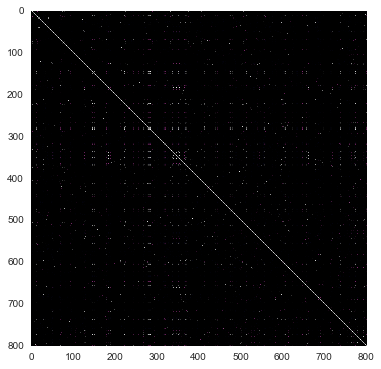

In [12]:
plt.figure(1, figsize = [18, 6])
plt.imshow(kernel_res, cmap = 'CMRmap')
plt.grid(False)

# Вывод
По диагонали стоят единички так как сравниваются одинаковые слова. 

### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [13]:
# Потратил 10 часов чтобы диагональ была закрашена по-нормальному, оказывается надо было просто увеличить размер фигуры.